In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
pd.options.display.float_format = "{:.18f}".format
plt.show( block=False )

In [ ]:
'''

SELECT del_fact.material      AS item
     , del_fact.sold_to_party AS sold_to
     --, data_fact.profit_center
     , del_fact.sales_organization AS sales_org
     , CASE
           WHEN del_fact.sales_organization='CA01' AND mat_master.division = '70' AND del_fact.distribution_channel = '20' THEN '30'
           ELSE del_fact.distribution_channel
       END AS distribution_channel
     --, del_fact.actual_goods_issue_date AS day
     , cal.fscl_wk_end_dt
     , del_fact.plant AS location
     , prod_hier.category
     , SUM(del_fact.delivery_quantity) AS delivery_quantity
     , SUM(del_fact.gross_weight) AS total_gross_weight
     , SUM(del_fact.net_weight) AS total_net_weight

FROM       PROD_KHC_LOGISTICS.transportation.sap_cat_delivery_fact del_fact
INNER JOIN "PROD_KHC_MASTER_DATA"."CALENDARS"."KHC_FISCAL_CALENDAR_DIM"            cal
ON         cal.cal_dt_int = del_fact.actual_goods_issue_date

INNER JOIN PROD_KHC_LOGISTICS.ORDER_MANAGEMENT.sap_cat_sales_document_item_data_fact data_fact 
ON         (del_fact.sales_document = data_fact.sales_document 
            AND 
            del_fact.order_item = data_fact.order_item 
            AND 
            data_fact.sales_doc_type IN ('ZAFX','ZEXP','ZOR','ZORX')
           )

INNER JOIN PROD_khc_master_data.product.sap_cat_product_material_master_dim mat_master 
ON         del_fact.material = mat_master.material 
AND        mat_master.MATL_TYPE = 'Z001'

INNER JOIN PROD_khc_master_data.product.SAP_CAT_PRODUCT_HIERARCHY_DIM prod_hier
ON         mat_master.prod_hier = prod_hier.prod_hier

LEFT JOIN   "PROD_KHC_MASTER_DATA"."CUSTOMER"."SAP_CAT_CUSTOMER_HIERARCHY_DIM" hier_dim
ON           del_fact.sales_organization = hier_dim.salesorg 
AND          CASE WHEN del_fact.sales_organization='CA01' AND mat_master.division = '70' AND del_fact.distribution_channel = '20' THEN '30' ELSE del_fact.distribution_channel END = hier_dim.distr_chan 
and          del_fact.sold_to_party = hier_dim.customer 

WHERE       ((
             del_fact.SALES_ORGANIZATION IN ('US01','CA01','PR01') 
             AND 
             del_fact.DISTRIBUTION_CHANNEL IN ('20','30','50')
             )
             OR 
             (del_fact.sales_organization = 'US13' 
              AND 
              del_fact.distribution_channel IN ('10','20')
             )
            )
AND         LOWER(hier_dim.customer_desc) LIKE '%wal%mart%'           
--AND         TRY_TO_NUMERIC(prod_hier.category) IN (25) 
AND         del_fact.material = '000000210006116100'

GROUP BY  del_fact.material      
        , del_fact.sold_to_party 
        --, data_fact.profit_center
        , del_fact.sales_organization 
        , CASE
             WHEN del_fact.sales_organization='CA01' AND mat_master.division = '70' AND del_fact.distribution_channel = '20' THEN '30'
             ELSE del_fact.distribution_channel
          END
        --, del_fact.actual_goods_issue_date AS day
        , cal.fscl_wk_end_dt
        , del_fact.plant 
        , prod_hier.category
ORDER BY 5 DESC, 2        
;        
'''

'\n\nSELECT del_fact.material      AS item\n     , del_fact.sold_to_party AS sold_to\n     --, data_fact.profit_center\n     , del_fact.sales_organization AS sales_org\n     , CASE\n           WHEN del_fact.sales_organization=\'CA01\' AND mat_master.division = \'70\' AND del_fact.distribution_channel = \'20\' THEN \'30\'\n           ELSE del_fact.distribution_channel\n       END AS distribution_channel\n     --, del_fact.actual_goods_issue_date AS day\n     , cal.fscl_wk_end_dt\n     , del_fact.plant AS location\n     , prod_hier.category\n     , SUM(del_fact.delivery_quantity) AS delivery_quantity\n     , SUM(del_fact.gross_weight) AS total_gross_weight\n     , SUM(del_fact.net_weight) AS total_net_weight\n\nFROM       PROD_KHC_LOGISTICS.transportation.sap_cat_delivery_fact del_fact\nINNER JOIN "PROD_KHC_MASTER_DATA"."CALENDARS"."KHC_FISCAL_CALENDAR_DIM"            cal\nON         cal.cal_dt_int = del_fact.actual_goods_issue_date\n\nINNER JOIN PROD_KHC_LOGISTICS.ORDER_MANAGEMENT.sap_c

In [ ]:
df = pd.read_csv("result_walmart_rc_particular_basecode_shipments.csv")
df.columns = [c.lower() for c in df.columns]
df['fscl_wk_end_dt'] = pd.to_datetime(df['fscl_wk_end_dt'])
df = df.sort_values(by=['fscl_wk_end_dt', 'sold_to', 'location'])
df['shipment_date'] = df['fscl_wk_end_dt']
df['shipment_date_1'] = df['fscl_wk_end_dt']
df

,item,sold_to,sales_org,distribution_channel,fscl_wk_end_dt,location,category,delivery_quantity,total_gross_weight,total_net_weight,shipment_date,shipment_date_1
7568,210006116100,100013103,US01,20,2017-11-18,106,1,270.000000000000000000,7012.710000000000036380,6480.000000000000000000,2017-11-18,2017-11-18
7569,210006116100,100033338,US01,20,2017-11-18,489,1,360.000000000000000000,9350.280000000000654836,8640.000000000000000000,2017-11-18,2017-11-18
7570,210006116100,100036076,US01,20,2017-11-18,5684,1,90.000000000000000000,2337.570000000000163709,2160.000000000000000000,2017-11-18,2017-11-18
7571,210006116100,200043365,US01,20,2017-11-18,478,1,180.000000000000000000,4675.140000000000327418,4320.000000000000000000,2017-11-18,2017-11-18
7572,210006116100,200064426,US01,20,2017-11-18,5418,1,1170.000000000000000000,30388.409999999999854481,28080.000000000000000000,2017-11-18,2017-11-18
...,...,...,...,...,...,...,...,...,...,...,...,...
5,210006116100,200469026,US01,20,2021-08-28,489,1,180.000000000000000000,4675.140000000000327418,4320.000000000000000000,2021-08-28,2021-08-28
6,210006116100,200587899,US01,20,2021-08-28,5418,1,180.000000000000000000,4675.140000000000327418,4320.000000000000000000,2021-08-28,2021-08-28
7,210006116100,200608093,US01,20,2021-08-28,478,1,180.000000000000000000,4675.140000000000327418,4320.000000000000000000,2021-08-28,2021-08-28
8,210006116100,200635298,US01,20,2021-08-28,5688,1,90.000000000000000000,2337.570000000000163709,2160.000000000000000000,2021-08-28,2021-08-28


In [ ]:
df.sales_org.drop_duplicates()

7568    US01
Name: sales_org, dtype: object

In [ ]:
df.distribution_channel.drop_duplicates()

7568    20
Name: distribution_channel, dtype: int64

In [ ]:
df.category.drop_duplicates()

7568    1
Name: category, dtype: int64

In [ ]:
df.location.drop_duplicates()

7568     106
7569     489
7570    5684
7571     478
7572    5418
7574    5688
7576     457
7589      21
6741    4086
6128     488
6131     490
6050     497
5603    7533
4713     398
Name: location, dtype: int64

In [ ]:
df.sold_to.drop_duplicates()

7568    100013103
7569    100033338
7570    100036076
7571    200043365
7572    200064426
          ...    
5603    200896436
4558    200004956
4569    200262543
4468    200998244
606     140144124
Name: sold_to, Length: 87, dtype: int64

In [ ]:
df.item.drop_duplicates()

7568    210006116100
Name: item, dtype: int64

In [ ]:
df.drop(columns=['sales_org', 'category', 'distribution_channel'], inplace=True)
df.head()

,item,sold_to,fscl_wk_end_dt,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date,shipment_date_1
7568,210006116100,100013103,2017-11-18,106,270.000000000000000000,7012.710000000000036380,6480.000000000000000000,2017-11-18,2017-11-18
7569,210006116100,100033338,2017-11-18,489,360.000000000000000000,9350.280000000000654836,8640.000000000000000000,2017-11-18,2017-11-18
7570,210006116100,100036076,2017-11-18,5684,90.000000000000000000,2337.570000000000163709,2160.000000000000000000,2017-11-18,2017-11-18
7571,210006116100,200043365,2017-11-18,478,180.000000000000000000,4675.140000000000327418,4320.000000000000000000,2017-11-18,2017-11-18
7572,210006116100,200064426,2017-11-18,5418,1170.000000000000000000,30388.409999999999854481,28080.000000000000000000,2017-11-18,2017-11-18


In [ ]:
shipment_agg_df = df.groupby(['item','sold_to','location']).agg({'delivery_quantity': ['sum'], 'total_net_weight': ['sum'], 'shipment_date': ['min'], 'fscl_wk_end_dt': ['max'], 'shipment_date_1': ['count']}).reset_index()
shipment_agg_df.columns = ['item','sold_to','location','delivery_quantity_agg','net_weight_agg', 'min_shipment_week', 'max_shipment_week', 'total_shipment_weeeks']
shipment_agg_df

,item,sold_to,location,delivery_quantity_agg,net_weight_agg,min_shipment_week,max_shipment_week,total_shipment_weeeks
0,210006116100,100013103,106,31965.000000000000000000,766680.000000000000000000,2017-11-18,2021-08-21,138
1,210006116100,100013103,398,180.000000000000000000,4320.000000000000000000,2019-03-30,2019-03-30,1
2,210006116100,100033338,398,180.000000000000000000,4320.000000000000000000,2019-04-06,2019-04-06,1
3,210006116100,100033338,489,70492.000000000000000000,1690368.000000000000000000,2017-11-18,2021-08-21,151
4,210006116100,100036076,398,180.000000000000000000,4320.000000000000000000,2019-03-30,2019-03-30,1
...,...,...,...,...,...,...,...,...
145,210006116100,200978199,398,180.000000000000000000,4320.000000000000000000,2019-04-06,2019-04-06,1
146,210006116100,200978199,5684,82807.000000000000000000,1985928.000000000000000000,2017-11-18,2021-08-21,152
147,210006116100,200998244,488,380.000000000000000000,0.000000000000000000,2021-01-30,2021-07-03,3
148,210006116100,200998244,497,40.000000000000000000,0.000000000000000000,2019-09-07,2019-09-07,1


In [ ]:
shipment_agg_df[(shipment_agg_df.item==210006116100) & (shipment_agg_df.sold_to==200945113)]

,item,sold_to,location,delivery_quantity_agg,net_weight_agg,min_shipment_week,max_shipment_week,total_shipment_weeeks
137,210006116100,200945113,398,180.000000000000000000,4320.000000000000000000,2019-04-06,2019-04-06,1
138,210006116100,200945113,489,24975.000000000000000000,599400.000000000000000000,2021-01-23,2021-08-28,27
139,210006116100,200945113,5418,177413.000000000000000000,4249272.000000000000000000,2017-11-18,2021-01-16,153
140,210006116100,200945113,5688,4770.000000000000000000,114480.000000000000000000,2020-11-14,2020-11-21,2


In [ ]:
shipment_location_duplicate_chk_df = df[['item','sold_to','location']].drop_duplicates().groupby(['item', 'sold_to']).nunique().reset_index()
shipment_location_duplicate_chk_df.columns = ['item','sold_to', 'location_count']
shipment_location_duplicate_chk_df[shipment_location_duplicate_chk_df.location_count > 1].sort_values(by=['item','sold_to'])

,item,sold_to,location_count
0,210006116100,100013103,2
1,210006116100,100033338,2
2,210006116100,100036076,2
5,210006116100,200001578,2
9,210006116100,200028346,2
10,210006116100,200043365,2
17,210006116100,200064426,2
20,210006116100,200076468,3
21,210006116100,200077886,2
22,210006116100,200089622,2


In [ ]:
split_location_df = shipment_location_duplicate_chk_df[shipment_location_duplicate_chk_df.location_count > 1].sort_values(by=['item','sold_to'])
split_location_df.reset_index(inplace=True)
split_location_df.drop(columns=['index'], inplace = True)
split_location_df

,item,sold_to,location_count
0,210006116100,100013103,2
1,210006116100,100033338,2
2,210006116100,100036076,2
3,210006116100,200001578,2
4,210006116100,200028346,2
5,210006116100,200043365,2
6,210006116100,200064426,2
7,210006116100,200076468,3
8,210006116100,200077886,2
9,210006116100,200089622,2


In [ ]:
split_location_df.shape

(49, 3)

In [ ]:
df[(df.item==210006116100) & (df.sold_to==200998244)]['location'].drop_duplicates()

4468    7533
3864     497
946      488
Name: location, dtype: int64

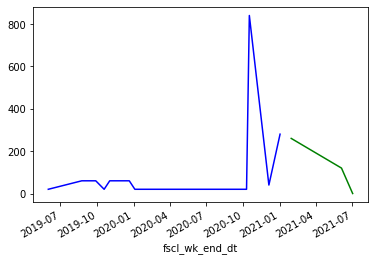

In [ ]:
temp_df_1 = df[(df.item==210006116100) & (df.sold_to==200998244) & (df.location==7533)]
temp_df_1.set_index('fscl_wk_end_dt', inplace=True)

temp_df_2 = df[(df.item==210006116100) & (df.sold_to==200998244) & (df.location==497)]
temp_df_2.set_index('fscl_wk_end_dt', inplace=True)

temp_df_3 = df[(df.item==210006116100) & (df.sold_to==200998244) & (df.location==488)]
temp_df_3.set_index('fscl_wk_end_dt', inplace=True)

temp_df_1.delivery_quantity.plot(color='b')
temp_df_2.delivery_quantity.plot(color='r')
temp_df_3.delivery_quantity.plot(color='g')

In [ ]:
'''
temp_df_2 = df[(df.item==210006116100) & (df.sold_to==200998244) & (df.location==497)]
temp_df_2.set_index('fscl_wk_end_dt', inplace=True)
temp_df_2.delivery_quantity.plot()
'''
df[(df.item==210006116100) & (df.sold_to==200998244) & (df.location==497)]

,item,sold_to,fscl_wk_end_dt,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date,shipment_date_1
3864,210006116100,200998244,2019-09-07,497,40.000000000000000000,0.000000000000000000,0.000000000000000000,2019-09-07,2019-09-07


In [ ]:
df[(df.item==210006116100) & (df.sold_to==200998244) & (df.shipment_date=='2019-09-07')]

,item,sold_to,fscl_wk_end_dt,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date,shipment_date_1
3864,210006116100,200998244,2019-09-07,497,40.000000000000000000,0.000000000000000000,0.000000000000000000,2019-09-07,2019-09-07


In [ ]:
df[(df.item==210006116100) & (df.sold_to==200998244) & (df.location==488)]

,item,sold_to,fscl_wk_end_dt,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date,shipment_date_1
946,210006116100,200998244,2021-01-30,488,260.000000000000000000,0.000000000000000000,0.000000000000000000,2021-01-30,2021-01-30
548,210006116100,200998244,2021-06-05,488,120.000000000000000000,0.000000000000000000,0.000000000000000000,2021-06-05,2021-06-05
370,210006116100,200998244,2021-07-03,488,0.000000000000000000,0.000000000000000000,0.000000000000000000,2021-07-03,2021-07-03


In [ ]:
df[(df.item==210006116100) & (df.sold_to==100013103) & (df.location==106)]

,item,sold_to,fscl_wk_end_dt,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date,shipment_date_1
7568,210006116100,100013103,2017-11-18,106,270.000000000000000000,7012.710000000000036380,6480.000000000000000000,2017-11-18,2017-11-18
7529,210006116100,100013103,2017-11-25,106,360.000000000000000000,9350.280000000000654836,8640.000000000000000000,2017-11-25,2017-11-25
7487,210006116100,100013103,2017-12-02,106,90.000000000000000000,2337.570000000000163709,2160.000000000000000000,2017-12-02,2017-12-02
7461,210006116100,100013103,2017-12-09,106,90.000000000000000000,2337.570000000000163709,2160.000000000000000000,2017-12-09,2017-12-09
7417,210006116100,100013103,2017-12-16,106,360.000000000000000000,9350.280000000000654836,8640.000000000000000000,2017-12-16,2017-12-16
...,...,...,...,...,...,...,...,...,...
166,210006116100,100013103,2021-07-24,106,270.000000000000000000,7012.710000000000036380,6480.000000000000000000,2021-07-24,2021-07-24
124,210006116100,100013103,2021-07-31,106,90.000000000000000000,2337.570000000000163709,2160.000000000000000000,2021-07-31,2021-07-31
82,210006116100,100013103,2021-08-07,106,90.000000000000000000,2337.570000000000163709,2160.000000000000000000,2021-08-07,2021-08-07
39,210006116100,100013103,2021-08-14,106,180.000000000000000000,4675.140000000000327418,4320.000000000000000000,2021-08-14,2021-08-14


In [ ]:
df[(df.item==210006116100) & (df.sold_to==100013103) & (df.location==398)]

,item,sold_to,fscl_wk_end_dt,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date,shipment_date_1
4713,210006116100,100013103,2019-03-30,398,180.000000000000000000,4675.140000000000327418,4320.000000000000000000,2019-03-30,2019-03-30


In [ ]:
df[(df.item==210006116100) & (df.sold_to==100013103) & (df.fscl_wk_end_dt=='2019-03-30')]

,item,sold_to,fscl_wk_end_dt,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date,shipment_date_1
4712,210006116100,100013103,2019-03-30,106,90.000000000000000000,2337.570000000000163709,2160.000000000000000000,2019-03-30,2019-03-30
4713,210006116100,100013103,2019-03-30,398,180.000000000000000000,4675.140000000000327418,4320.000000000000000000,2019-03-30,2019-03-30


In [ ]:
df[(df.item==210006116100) & (df.sold_to==100013103)].groupby(['item','sold_to','location']).agg({'delivery_quantity': ['sum'], 'total_net_weight': ['sum'], 'shipment_date': ['min'], 'fscl_wk_end_dt': ['max'], 'shipment_date_1': ['count']}).reset_index()

,item,sold_to,location,delivery_quantity,total_net_weight,shipment_date,fscl_wk_end_dt,shipment_date_1
,,,,sum,sum,min,max,count
0,210006116100,100013103,106,31965.000000000000000000,766680.000000000000000000,2017-11-18,2021-08-21,138
1,210006116100,100013103,398,180.000000000000000000,4320.000000000000000000,2019-03-30,2019-03-30,1


In [ ]:
'''
210006116100 200028346
[5688, 490]
'''
df[(df.item==210006116100) & (df.sold_to==200028346)].groupby(['item','sold_to','location']).agg({'delivery_quantity': ['sum'], 'total_net_weight': ['sum'], 'shipment_date': ['min'], 'fscl_wk_end_dt': ['max'], 'shipment_date_1': ['count']}).reset_index()

,item,sold_to,location,delivery_quantity,total_net_weight,shipment_date,fscl_wk_end_dt,shipment_date_1
,,,,sum,sum,min,max,count
0,210006116100,200028346,490,2840.000000000000000000,0.000000000000000000,2018-10-13,2019-11-30,14
1,210006116100,200028346,5688,6765.000000000000000000,0.000000000000000000,2018-09-08,2021-07-10,16


In [ ]:
df[(df.item==210006116100) & (df.sold_to==200028346) & (df.fscl_wk_end_dt >= '2018-10-13') & (df.fscl_wk_end_dt <= '2019-11-30')].groupby(['item','sold_to','location']).agg({'delivery_quantity': ['sum'], 'total_net_weight': ['sum'], 'shipment_date': ['min'], 'fscl_wk_end_dt': ['max'], 'shipment_date_1': ['count']}).reset_index()

,item,sold_to,location,delivery_quantity,total_net_weight,shipment_date,fscl_wk_end_dt,shipment_date_1
,,,,sum,sum,min,max,count
0,210006116100,200028346,490,2840.000000000000000000,0.000000000000000000,2018-10-13,2019-11-30,14


In [ ]:
df[(df.item==210006116100) & (df.sold_to==200945113)]['location'].drop_duplicates()

7608    5418
4708     398
1318    5688
955      489
Name: location, dtype: int64

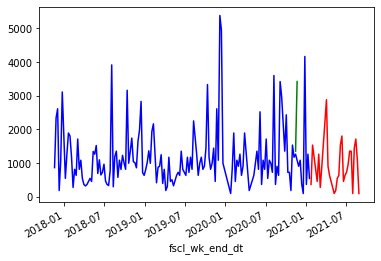

In [ ]:
temp_df_1 = df[(df.item==210006116100) & (df.sold_to==200945113) & (df.location==5418)]
temp_df_1.set_index('fscl_wk_end_dt', inplace=True)

temp_df_2 = df[(df.item==210006116100) & (df.sold_to==200945113) & (df.location==398)]
temp_df_2.set_index('fscl_wk_end_dt', inplace=True)

temp_df_3 = df[(df.item==210006116100) & (df.sold_to==200945113) & (df.location==5688)]
temp_df_3.set_index('fscl_wk_end_dt', inplace=True)

temp_df_4 = df[(df.item==210006116100) & (df.sold_to==200945113) & (df.location==489)]
temp_df_4.set_index('fscl_wk_end_dt', inplace=True)

temp_df_1.delivery_quantity.plot(color='b')
temp_df_2.delivery_quantity.plot(color='c')
temp_df_3.delivery_quantity.plot(color='g')
temp_df_4.delivery_quantity.plot(color='r')

In [ ]:
df[(df.item==210006116100) & (df.sold_to==200945113) & (df.location==5688)]

,item,sold_to,fscl_wk_end_dt,location,delivery_quantity,total_gross_weight,total_net_weight,shipment_date,shipment_date_1
1318,210006116100,200945113,2020-11-14,5688,1350.000000000000000000,35063.550000000002910383,32400.000000000000000000,2020-11-14,2020-11-14
1264,210006116100,200945113,2020-11-21,5688,3420.000000000000000000,88827.660000000003492460,82080.000000000000000000,2020-11-21,2020-11-21


210006116100 100013103
[106, 398]


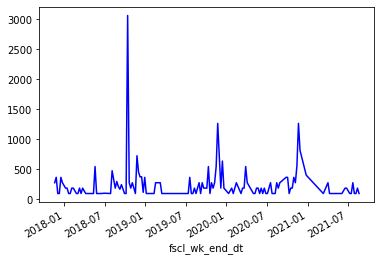

******************************************
210006116100 100033338
[489, 398]


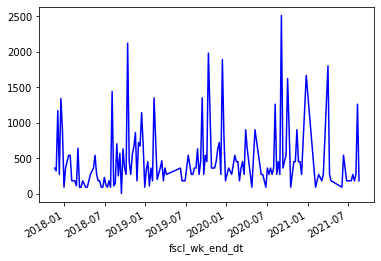

******************************************
210006116100 100036076
[5684, 398]


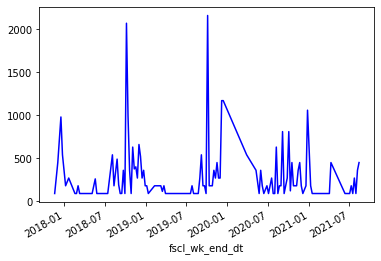

******************************************
210006116100 200001578
[490, 488]


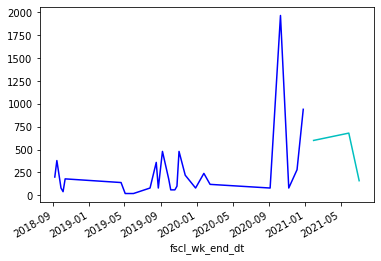

******************************************
210006116100 200028346
[5688, 490]


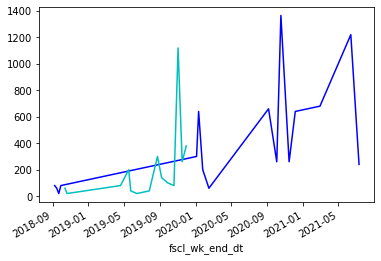

******************************************
210006116100 200043365
[478, 398]


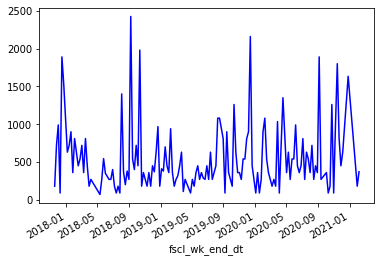

******************************************
210006116100 200064426
[5418, 398]


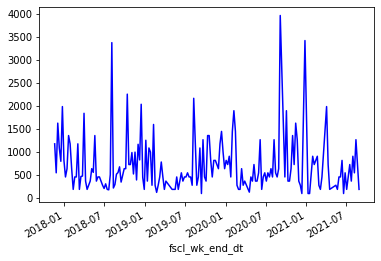

******************************************
210006116100 200076468
[106, 398, 478]


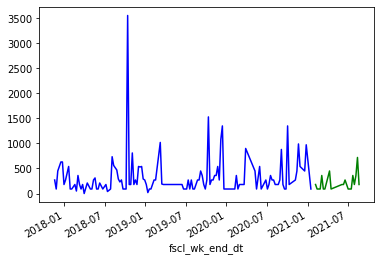

******************************************
210006116100 200077886
[5688, 398]


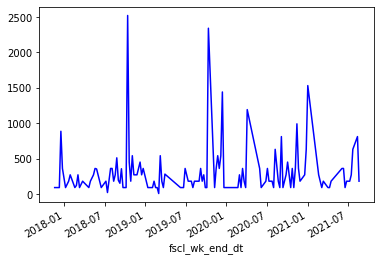

******************************************
210006116100 200089622
[489, 398]


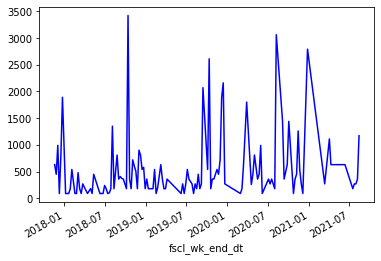

******************************************
210006116100 200126662
[457, 398]


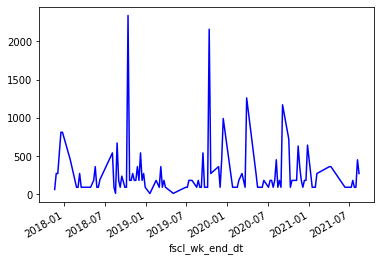

******************************************
210006116100 200146886
[457, 398]


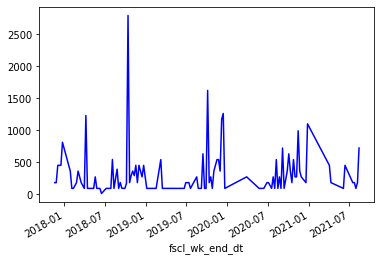

******************************************
210006116100 200150154
[489, 398]


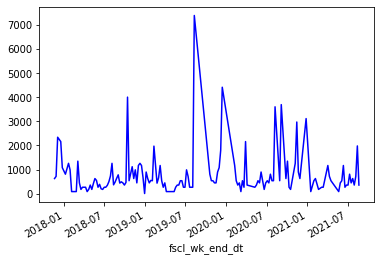

******************************************
210006116100 200159503
[478, 5688, 398, 5418]


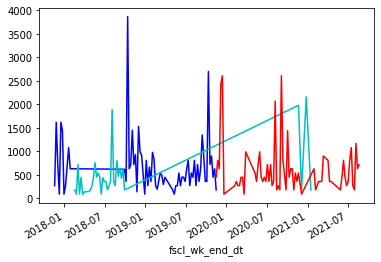

******************************************
210006116100 200188219
[478, 398]


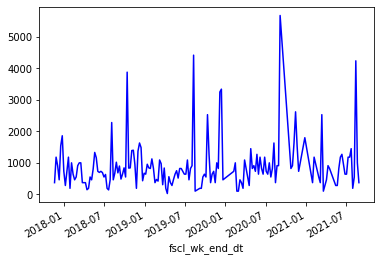

******************************************
210006116100 200192986
[5688, 478, 5418, 398]


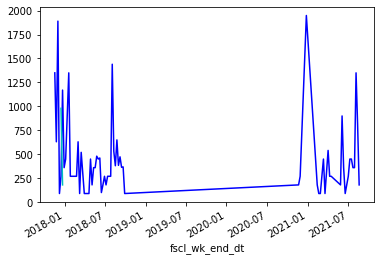

******************************************
210006116100 200241678
[4086, 5684]


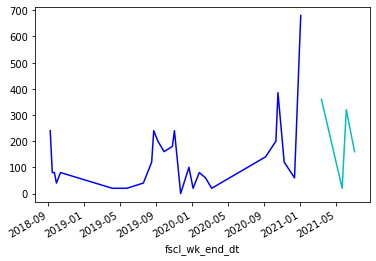

******************************************
210006116100 200282060
[5684, 398]


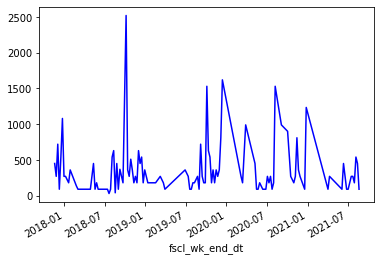

******************************************
210006116100 200286892
[478, 398]


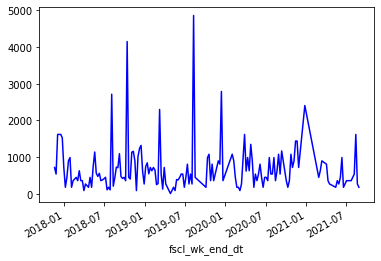

******************************************
210006116100 200322609
[5418, 398]


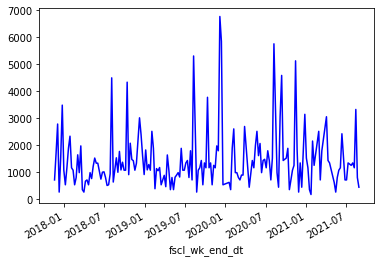

******************************************
210006116100 200373884
[5684, 398]


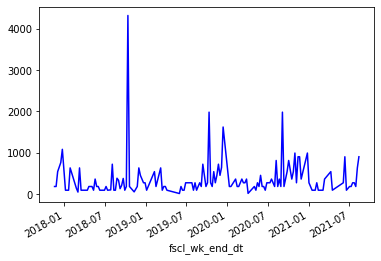

******************************************
210006116100 200374953
[5418, 398, 5688]


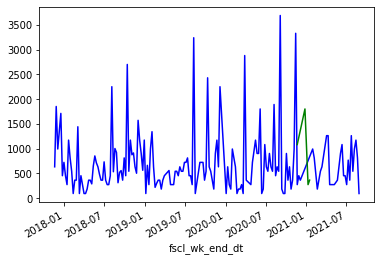

******************************************
210006116100 200379012
[5684, 398]


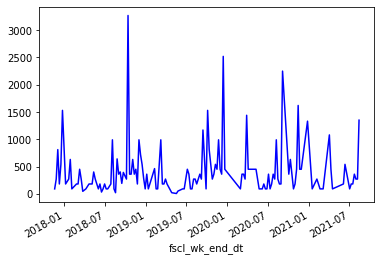

******************************************
210006116100 200392038
[457, 398]


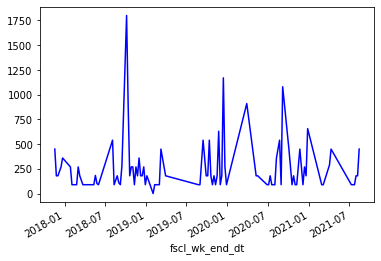

******************************************
210006116100 200460338
[21, 398]


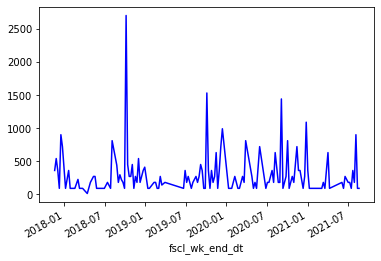

******************************************
210006116100 200469026
[5418, 398, 5684, 489]


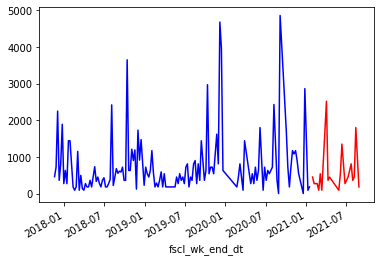

******************************************
210006116100 200485035
[489, 398]


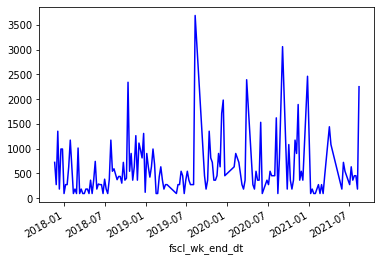

******************************************
210006116100 200489693
[5684, 398]


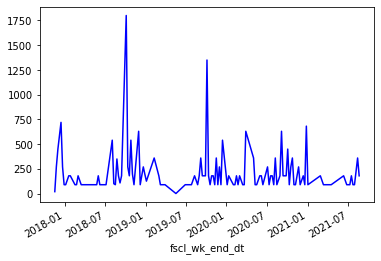

******************************************
210006116100 200490501
[5688, 398]


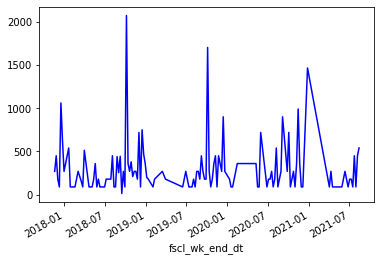

******************************************
210006116100 200587899
[5418, 398, 478]


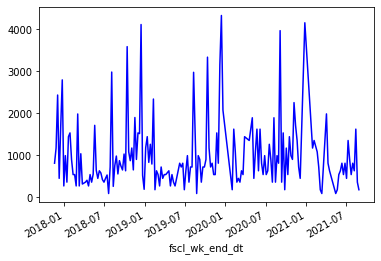

******************************************
210006116100 200598096
[5688, 490]


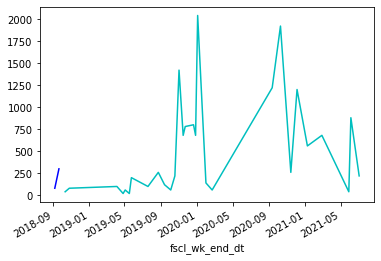

******************************************
210006116100 200605356
[489, 398]


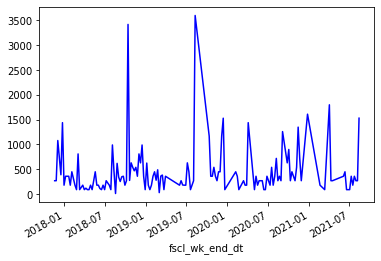

******************************************
210006116100 200608093
[478, 398]


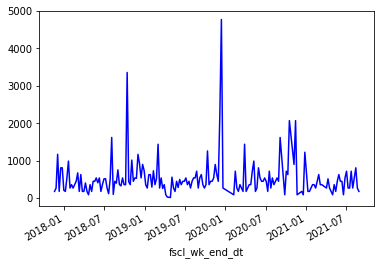

******************************************
210006116100 200635298
[5688, 398]


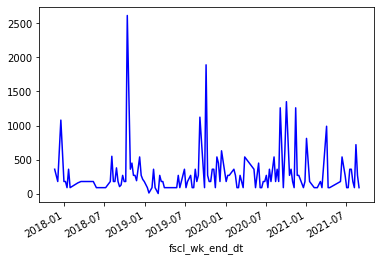

******************************************
210006116100 200643426
[21, 398]


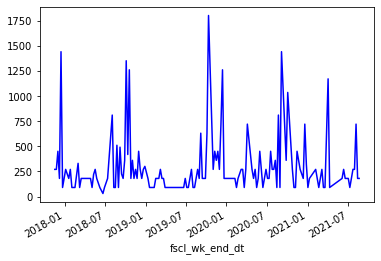

******************************************
210006116100 200685254
[5418, 398]


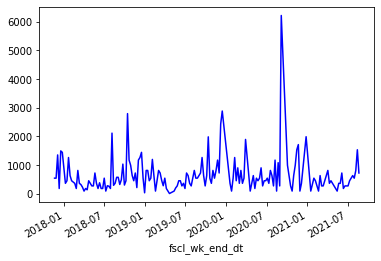

******************************************
210006116100 200716719
[5684, 398]


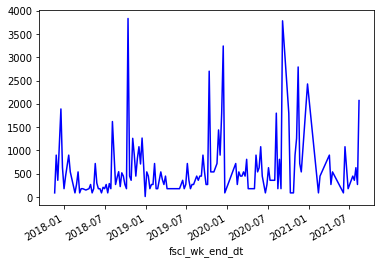

******************************************
210006116100 200740443
[478, 398]


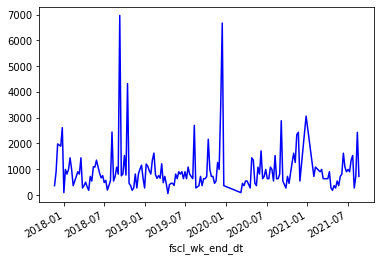

******************************************
210006116100 200756444
[5684, 398]


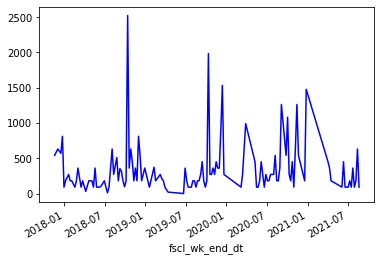

******************************************
210006116100 200839146
[5418, 398, 478]


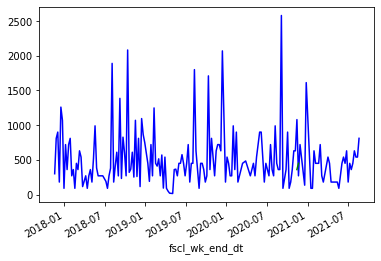

******************************************
210006116100 200879871
[489, 398]


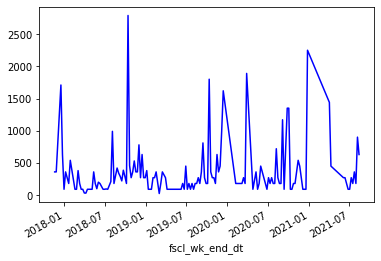

******************************************
210006116100 200888796
[5418, 398, 489]


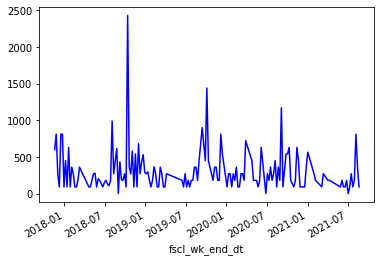

******************************************
210006116100 200888905
[490, 488]


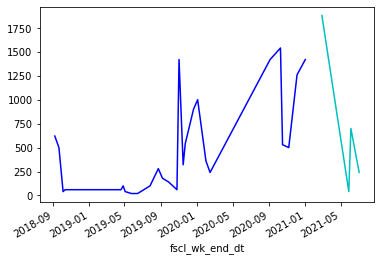

******************************************
210006116100 200893745
[5418, 398]


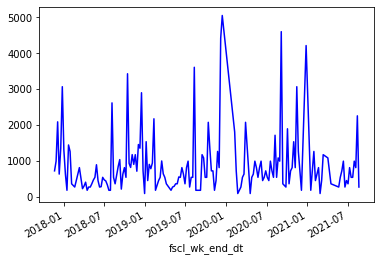

******************************************
210006116100 200943991
[21, 398]


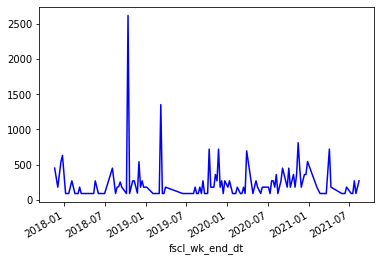

******************************************
210006116100 200945113
[5418, 398, 5688, 489]


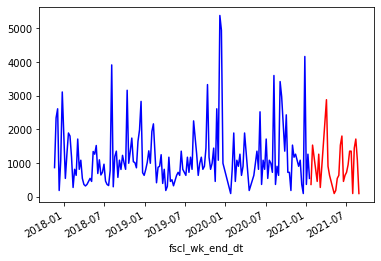

******************************************
210006116100 200954903
[5688, 398]


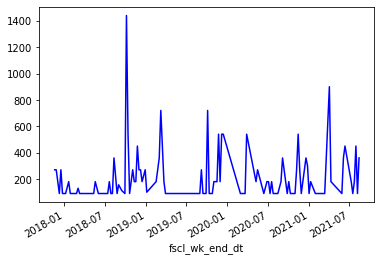

******************************************
210006116100 200978199
[5684, 398]


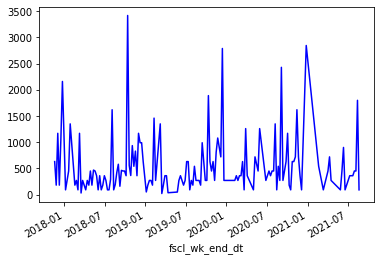

******************************************
210006116100 200998244
[7533, 497, 488]


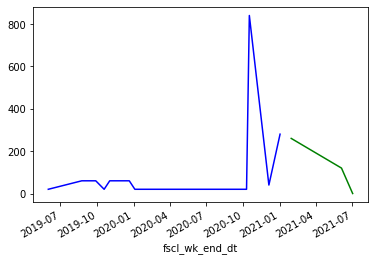

******************************************


In [ ]:
for i in range(len(split_location_df)) :
  print(split_location_df.loc[i, "item"], split_location_df.loc[i, "sold_to"])
  v_item, v_sold_to, v_loation_count = split_location_df.loc[i, "item"], split_location_df.loc[i, "sold_to"], split_location_df.loc[i, "location_count"]
  location_list = list(df[(df.item==v_item) & (df.sold_to==v_sold_to)]['location'].drop_duplicates())
  print(location_list)
  
  temp_df_1 = df[(df.item==v_item) & (df.sold_to==v_sold_to) & (df.location==location_list[0])]
  temp_df_1.set_index('fscl_wk_end_dt', inplace=True)
  
  temp_df_2 = df[(df.item==v_item) & (df.sold_to==v_sold_to) & (df.location==location_list[1])]
  temp_df_2.set_index('fscl_wk_end_dt', inplace=True)
  
  temp_df_1.delivery_quantity.plot(color='b')
  temp_df_2.delivery_quantity.plot(color='c')
  
  if v_loation_count == 3:
      temp_df_3 = df[(df.item==v_item) & (df.sold_to==v_sold_to) & (df.location==location_list[2])]
      temp_df_3.set_index('fscl_wk_end_dt', inplace=True)
      temp_df_3.delivery_quantity.plot(color='g')
  
  if v_loation_count == 4:
      temp_df_4 = df[(df.item==v_item) & (df.sold_to==v_sold_to) & (df.location==location_list[3])]
      temp_df_4.set_index('fscl_wk_end_dt', inplace=True)
      temp_df_4.delivery_quantity.plot(color='r')

  plt.show( block=False )

  print("******************************************")